# **PCA and Gradient Descent-Based Linear Classification Model for Breast Cancer Detection**

This project implements a linear classification model to distinguish between benign and malignant breast tumors. The model first applies Principal Component Analysis (PCA) for dimensionality reduction as the dataset contains 30 features, followed by gradient descent to optimize a logistic regression classifier. The dataset used is the Breast Cancer Wisconsin dataset from sklearn. The model is trained on a manually split dataset, and its performance is evaluated on the testing set, achieving an accuracy of approximately 97%.

### Importing Necessary Libraries:

In the following cell, let's import the necessary libraries for this project, starting with **numpy** that is used for numerical operations, then **load_breast_cancer** that is used to load the Breast Cancer Wisconsin dataset, and finally **matplotlib.pyplot** a library for plotting graphs and visualizing data.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

### Loading the Dataset:

Here we will load our dataset. **breast** contains the entire breast cancer dataset, **breast_data** contains the features (measurements) of the dataset, and **breast_target** contains the labels (0 for benign and 1 for malignant).

In [2]:
breast = load_breast_cancer()
breast_data = breast.data
breast_target = breast.target

### Standardizing the Data:

The following function standardizes the dataset by subtracting the mean and dividing by the standard deviation for each feature. Standardization is crucial for PCA and gradient descent to ensure features are on the same scale. Therefore, I always keep in mind standardizing my data in any projects I work on.

In [3]:
def standardize_data(X):
    mean_X = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_standardized = (X - mean_X) / std_dev
    return X_standardized

### Performing PCA:

PCA is a powerful tool for reducing the dimensionality of your data while preserving as much variability as possible. This can help with visualizing complex datasets, speeding up algorithms, and removing noise. Here the necessary steps to perfom PCA:
* Step 1: The data is centered by subtracting the mean.
* Step 2: The covariance matrix is computed to capture the variance between features.
* Step 3: Eigenvectors and eigenvalues are computed, representing the directions and magnitude of maximum variance in the data.
* Step 4: The data is projected onto the new feature space formed by the top n_components principal components.

In [7]:
def perfom_pca(data, n_components):
    
    # Standardize the data (center the data)
    mean_vector = np.mean(data, axis=0)
    mean_matrix = np.repeat(mean_vector, len(data))
    mean_matrix = mean_matrix.reshape(data.shape, order="F")
    centered_data = data - mean_matrix

    # Compute the covariance matrix
    cov_matrix = (np.dot(centered_data.T, centered_data)) / (len(centered_data) - 1)

    # Compute the eigenvectors and eigenvalues and Sort them
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Project the data onto the new feature space
    projection_matrix = sorted_eigenvectors[:, :n_components]
    transformed_data = centered_data.dot(projection_matrix)
    return transformed_data

### Applying Standardization and PCA:

Here the data is standardized and reduced to 2 principal components using PCA.

In [5]:
data = standardize_data(breast_data)
transformed_data = perfom_pca(data, n_components=2)

### Manual Data Splitting:

In the following cell I tried to split the data manually into training (80%) and testing (20%) sets.

In [8]:
split_ratio = 0.8
split_index = int(len(transformed_data) * split_ratio)
X_train = transformed_data[:split_index]
y_train = breast_target[:split_index]
X_test = transformed_data[split_index:]
y_test = breast_target[split_index:]

### Gradient Descent and Sigmoid Function Implementation:

In this example, I used the sigmoid function as the activation function for this binary classification.

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Then, all I did was as below:
* Step 1: Initialize the parameters (w_in, b_in).
* Step 2: Iteratively update the weights and bias using the gradients computed from the cost function.
* Step 3: Store the cost and weights history for later analysis.

In [11]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []  # To store cost function values
    w_history = []  # To store parameter values

    m = len(y)

    for i in range(num_iters):
        # Compute z and the sigmoid function
        z = np.dot(X, w_in) + b_in
        f = sigmoid(z)

        # Compute the cost function
        total_cost = np.mean(-y * np.log(f) - (1 - y) * np.log(1 - f))
        J_history.append(total_cost)

        # Compute the gradient
        err = (f - y)
        dj_dw = (np.dot(X.T, err)) / m
        dj_db = np.mean(err)

        # Update parameters
        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db

        if i % (num_iters // 10) == 0 or i == (num_iters - 1):  # Print cost at intervals
            w_history.append(w_in.copy())
            print(f"Iteration {i:4}: Cost {total_cost:8.6f}")

    return w_in, b_in, J_history, w_history

### Training the Model:

Here I trained the model using gradient descent with the initialized parameters, learning rate, and number of iterations.

In [15]:
# Initialize parameters
w_in = np.zeros(X_train.shape[1])
b_in = 0
alpha = 0.1
num_iters = 500

# Train the model using gradient descent
w, b, _, _ = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iters)

Iteration    0: Cost 0.693147
Iteration   50: Cost 0.160362
Iteration  100: Cost 0.141726
Iteration  150: Cost 0.135104
Iteration  200: Cost 0.131835
Iteration  250: Cost 0.129956
Iteration  300: Cost 0.128776
Iteration  350: Cost 0.127993
Iteration  400: Cost 0.127451
Iteration  450: Cost 0.127066
Iteration  499: Cost 0.126792


### Model Evaluation:

Here I evaluated the model's performance on the test set by calculating the accuracy of the predictions.

In [16]:
# Evaluate the model on the test data
z_test = np.dot(X_test, w) + b
y_test_pred = sigmoid(z_test) >= 0.5

# Calculate accuracy
accuracy = np.mean(y_test_pred == y_test)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

Test Set Accuracy: 97.37%


### Plotting the Results:

Finally, The decision boundary, along with the training and testing data points, is plotted to visualize the model's performance.

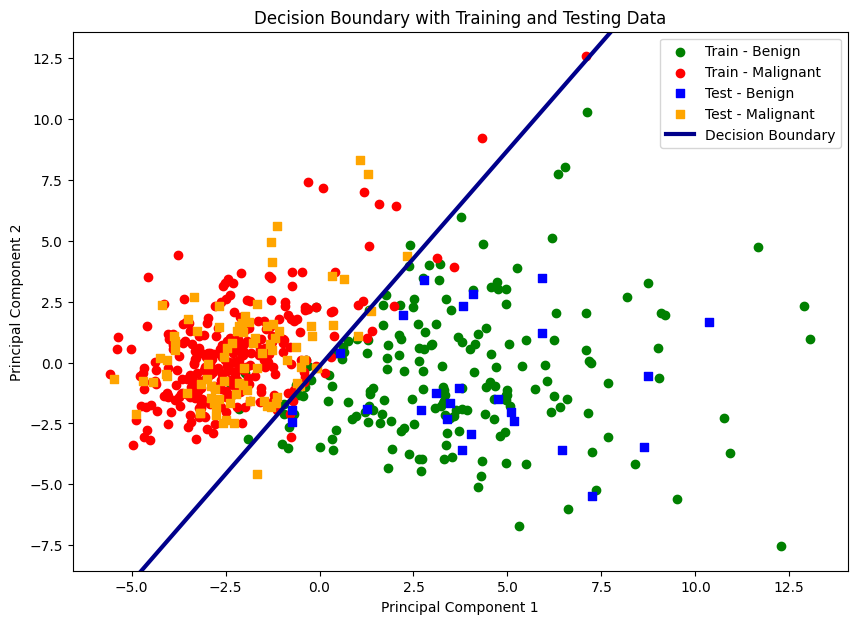

In [14]:
# Plotting
plt.figure(figsize=(10, 7))

# Plot the training data (circles)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='green', marker='o', label='Train - Benign')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', marker='o', label='Train - Malignant')

# Plot the testing data (rectangles)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', marker='s', label='Test - Benign')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='orange', marker='s', label='Test - Malignant')

# Compute the decision boundary line
plot_x = np.array([min(X_train[:, 0]), max(X_train[:, 0])])
plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

# Plot the decision boundary
plt.plot(plot_x, plot_y, color='darkblue', label='Decision Boundary', linewidth=3)

# Set plot limits
plt.xlim([min(X_train[:, 0]) - 1, max(X_train[:, 0]) + 1])
plt.ylim([min(X_train[:, 1]) - 1, max(X_train[:, 1]) + 1])

# Add labels, title, and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary with Training and Testing Data')
plt.legend()

# Show the plot
plt.show()

# **Conclusion**

In this project, my goal was to implement a complete machine learning pipeline for binary classification using PCA for dimensionality reduction and logistic regression optimized via gradient descent. The model was trained on an 80% training set and tested on a 20% testing set. The model achieved a high accuracy, demonstrating its effectiveness in classifying breast cancer as benign or malignant based on the reduced feature set. The visualizations provided a clear insight into the decision boundary and how well the model separates the two classes.